In [5]:
from pymongo import MongoClient
import pandas as pd
import numpy as np

client = MongoClient("mongodb://localhost:27017/")
db = client["MOOC"]
collection = db["forum"]

# Liste pour accumuler les données filtrées
rows = []

# Traitement en lot
batch_size = 1000
cursor = collection.find({"content.course_id":"MinesTelecom/04017/session01"}, no_cursor_timeout=True).batch_size(batch_size)

for doc in cursor:
    content = doc.get("content", {})
    rows.append({
        "_id": doc.get("_id"),
        "titre": content.get("title"),
        "titre_sujet": content.get("courseware_title"),
        "Nom_du_cours": content.get("course_id"),
        "contenu_message": content.get("body"),
        "username": content.get("username"),
        "votes": content.get("votes", {}).get("count", 0),
        "comments_count": content.get("comments_count", 0),
        "created_at": content.get("created_at"),
    })


df = pd.DataFrame(rows)
df.head()


/home/maximilien/Documents/Formation DATA IA/Projet-MOOC/env/lib/python3.12/site-packages/pymongo/synchronous/collection.py:1945: UserWarning: use an explicit session with no_cursor_timeout=True otherwise the cursor may still timeout after 30 minutes, for more info see https://mongodb.com/docs/v4.4/reference/method/cursor.noCursorTimeout/#session-idle-timeout-overrides-nocursortimeout
  return Cursor(self, *args, **kwargs)


,_id,titre,titre_sujet,Nom_du_cours,contenu_message,username,votes,comments_count,created_at
0,56fce2f6bf989a69b0000043,Présentation,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,Bonjour à tous\nJe m'appelle Jean-Louis\n,Djuz87,0,0,2016-03-31T08:42:30Z
1,56fce48360d73bd31400003c,Fablab ?,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour,\nje m'appelle Thomas, j'habite Mens (...",Togo,0,3,2016-03-31T08:49:07Z
2,56fce4f06b03283c5c00002f,Présentation,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour à tous, je m'appelle Carola. J'ai déjà...",Carola,0,2,2016-03-31T08:50:56Z
3,56fce6009b101d3794000044,Présentation,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour,\nje m'appelle Nicolas,\nje fais de l'...",nicopupu,0,0,2016-03-31T08:55:28Z
4,56fce65260d73b496f000034,PRSENTATION,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour,\nJe suis Wassim IBRAHIM étudiant en 2...",wassim_ibrahim,0,0,2016-03-31T08:56:50Z


In [6]:
df["titre_sujet"].value_counts().head(15)

titre_sujet
Bienvenue / Présentez-vous                               355
Bienvenue / Bug / questions techniques plateforme FUN    112
Semaine 1 / Des questions sur le TP feu tricolore        111
Semaine 2 / TP Feux piétons                               96
Semaine 3 / TP et évaluation par les pairs                65
Semaine 4 / Des questions sur le TP4                      38
Semaine 2 / Les capteurs                                  28
Semaine 1 / Questions sur le simulateur                   26
Semaine 1 / Correction du TP                              23
Semaine 2 / Corrigé du TP                                 22
Vos retours sur le MOOC / Votre avis nous intéresse       20
Semaine 3 / Capteurs analogiques                          19
Semaine 4 / Des questions sur la correction du TP3        15
Semaine 4 / Librairies et Sorties                         13
Semaine 4 / Les condensateurs                             13
Name: count, dtype: int64

In [7]:
df["titre"].value_counts().head(5)

titre
Présentation      61
Bonjour           33
Presentation      13
Bonjour à tous    10
Présentation       7
Name: count, dtype: int64

In [8]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(df['contenu_message'].fillna(""), show_progress_bar=True)


/home/maximilien/Documents/Formation DATA IA/Projet-MOOC/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████████████████████████████████████████████████████████████| 33/33 [00:12<00:00,  2.66it/s]


In [9]:
df.head()

,_id,titre,titre_sujet,Nom_du_cours,contenu_message,username,votes,comments_count,created_at
0,56fce2f6bf989a69b0000043,Présentation,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,Bonjour à tous\nJe m'appelle Jean-Louis\n,Djuz87,0,0,2016-03-31T08:42:30Z
1,56fce48360d73bd31400003c,Fablab ?,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour,\nje m'appelle Thomas, j'habite Mens (...",Togo,0,3,2016-03-31T08:49:07Z
2,56fce4f06b03283c5c00002f,Présentation,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour à tous, je m'appelle Carola. J'ai déjà...",Carola,0,2,2016-03-31T08:50:56Z
3,56fce6009b101d3794000044,Présentation,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour,\nje m'appelle Nicolas,\nje fais de l'...",nicopupu,0,0,2016-03-31T08:55:28Z
4,56fce65260d73b496f000034,PRSENTATION,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour,\nJe suis Wassim IBRAHIM étudiant en 2...",wassim_ibrahim,0,0,2016-03-31T08:56:50Z


In [10]:
import pandas as pd

embedding_df = pd.DataFrame(embeddings)
embedding_df.head(5) 

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.077351,0.302860,0.108817,0.026086,-0.051031,-0.005521,0.430900,0.208627,-0.192062,0.038090,...,0.299119,0.060500,-0.141210,-0.015820,-0.004702,0.044103,0.094373,0.098032,-0.249772,-0.208332
1,-0.045120,0.008895,-0.079803,-0.119898,-0.118823,-0.149108,0.070262,-0.126622,-0.337958,-0.191502,...,-0.005341,0.137207,-0.007949,0.148240,-0.003263,-0.026307,0.243705,-0.014152,-0.375329,-0.066965
2,-0.159734,-0.140873,0.034510,0.154332,-0.095933,-0.008137,-0.072599,0.125766,0.053007,0.208469,...,0.169782,0.036861,0.160754,-0.011147,-0.044389,0.254618,0.025003,-0.017798,-0.292190,0.093223
3,-0.089242,-0.096574,-0.139417,-0.170987,-0.202958,-0.126537,0.082318,0.019438,-0.049421,0.099784,...,0.126892,0.163513,-0.051057,0.060892,-0.134078,0.204711,0.091085,0.213374,-0.122243,-0.002105
4,-0.126523,0.035634,-0.081626,-0.153235,-0.142326,-0.076603,-0.030235,0.154097,-0.117815,0.086847,...,0.239244,0.055924,0.043825,-0.227746,-0.083381,0.128033,-0.047005,0.139510,-0.217033,-0.143969


Détermination du nombre de n_clusters

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2, 20):
    km = KMeans(n_clusters=k, random_state=42).fit(embeddings)
    score = silhouette_score(embeddings, km.labels_)
    print(f"Clusters: {k}, Silhouette score: {score:.3f}")


Clusters: 2, Silhouette score: 0.102
Clusters: 3, Silhouette score: 0.063
Clusters: 4, Silhouette score: 0.055
Clusters: 5, Silhouette score: 0.057
Clusters: 6, Silhouette score: 0.049
Clusters: 7, Silhouette score: 0.045
Clusters: 8, Silhouette score: 0.048
Clusters: 9, Silhouette score: 0.047
Clusters: 10, Silhouette score: 0.047
Clusters: 11, Silhouette score: 0.043
Clusters: 12, Silhouette score: 0.043
Clusters: 13, Silhouette score: 0.043
Clusters: 14, Silhouette score: 0.041
Clusters: 15, Silhouette score: 0.045
Clusters: 16, Silhouette score: 0.044
Clusters: 17, Silhouette score: 0.040
Clusters: 18, Silhouette score: 0.041
Clusters: 19, Silhouette score: 0.039


Le score le plus élevé bien que faible est 4. 

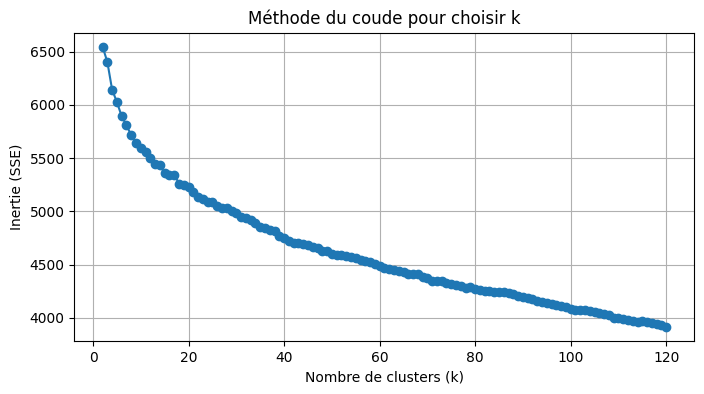

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Choix du nombre max de clusters à tester
max_k = 120
inertias = []

# Calcul de l'inertie pour chaque valeur de k
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertias.append(kmeans.inertia_)

# Tracé du coude
plt.figure(figsize=(8, 4))
plt.plot(range(2, max_k + 1), inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (SSE)')
plt.title('Méthode du coude pour choisir k')
plt.grid(True)
plt.show()


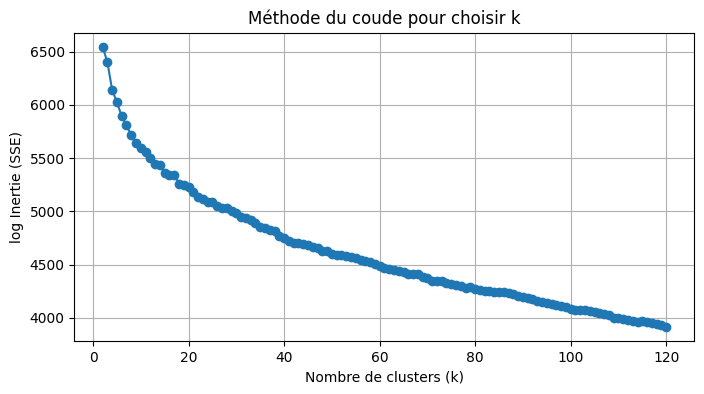

In [15]:
# Tracé du coude
inertias2 = np.log(inertias)
plt.figure(figsize=(8, 4))
plt.plot(range(2, max_k + 1), inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('log Inertie (SSE)')
plt.title('Méthode du coude pour choisir k')
plt.grid(True)
plt.show()

In [16]:

graph = np.diff(inertias)


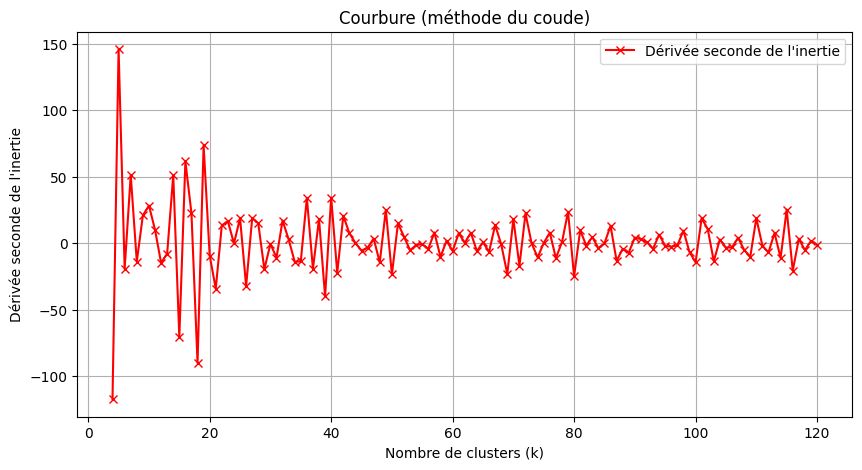

In [17]:
# 1. Calcul des dérivées
first_derivative = np.diff(inertias)
second_derivative = np.diff(first_derivative)

# 2. Définir l'axe x correspondant
x_second_derivative = range(4, max_k + 1)  # Commence à 4 car on a retiré deux valeurs

# 3. Tracer la courbe
plt.figure(figsize=(10, 5))
plt.plot(x_second_derivative, second_derivative, marker='x', color='red', label="Dérivée seconde de l'inertie")
plt.xlabel('Nombre de clusters (k)')
plt.ylabel("Dérivée seconde de l'inertie")
plt.title("Courbure (méthode du coude)")
plt.grid(True)
plt.legend()
plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

# Tes données
xdata = np.arange(2, max_k + 1)
ydata = np.log(inertias)  # ou inertias si tu préfères en échelle linéaire

y_pred = poly_func(xdata, *params)

# Fonction génératrice de polynômes
def poly_func(x, *coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

# Comparaison sur plusieurs degrés
degrees = range(1, 10)  # degré 1 à 6
rmse_scores = []
r2_scores = []
fits = {}

for deg in degrees:
    p0 = np.ones(deg + 1)  # initial guess
    params, _ = curve_fit(lambda x, *p: poly_func(x, *p), xdata, ydata, p0=p0)
    y_pred = poly_func(xdata, *params)
    rmse = np.sqrt(np.mean((ydata - y_pred) ** 2))
    rmse_scores.append(rmse)
    r2 = r2_score(ydata, y_pred)
    r2_scores.append(r2)
    fits[deg] = (params, y_pred)

# Afficher l'erreur par degré
plt.figure(figsize=(8, 4))
plt.plot(degrees, rmse_scores, marker='o', color='purple')
plt.xlabel('Degré du polynôme')
plt.ylabel('RMSE (log inertie)')
plt.title('Erreur en fonction du degré du polynôme')
plt.grid(True)
plt.show()

# Afficher le r² par degré
plt.figure(figsize=(8, 4))
plt.plot(degrees, r2_scores, marker='o', color='purple')
plt.xlabel('Degré du polynôme')
plt.ylabel('R2 (log inertie)')
plt.title('Résultat en fonction du degré du polynôme')
plt.grid(True)
plt.show()

# Tracer le meilleur fit
best_deg = degrees[np.argmin(rmse_scores)]
best_params, _ = fits[best_deg]
x_fit = np.linspace(min(xdata), max(xdata), 200)
y_fit = poly_func(x_fit, *best_params)

plt.figure(figsize=(8, 4))
plt.plot(xdata, ydata, 'o', label='log(Inertie)')
plt.plot(x_fit, y_fit, '-', label=f'Fit polynôme degré {best_deg}')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('log Inertie (SSE)')
plt.title(f'Meilleur ajustement polynomial (degré {best_deg})')
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Meilleur degré : {best_deg} avec RMSE = {min(rmse_scores):.4f}")


NameError: name 'poly_func' is not defined

In [20]:
log_inertias = np.log(inertias)

Paramètres : a = 0.224923, b = 0.141498, c = 8.617751, d = -0.004067, e = 0.00001040
RMSE : 0.004475
Le k optimal estimé par la dérivée troisième est : 2.00
Le k optimal estimé par la courbure normalisée est : 2.00
Paramètres du modèle :
a = 0.224923 (amplitude exponentielle)
b = 0.141498 (taux de décroissance)
c = 8.617751 (offset)
d = -0.004067 (terme linéaire)
e = 0.00001040 (terme quadratique)
RMSE global : 0.004475
Erreur maximale : 0.011992
Erreur minimale : 0.000050
Erreur moyenne : 0.003592


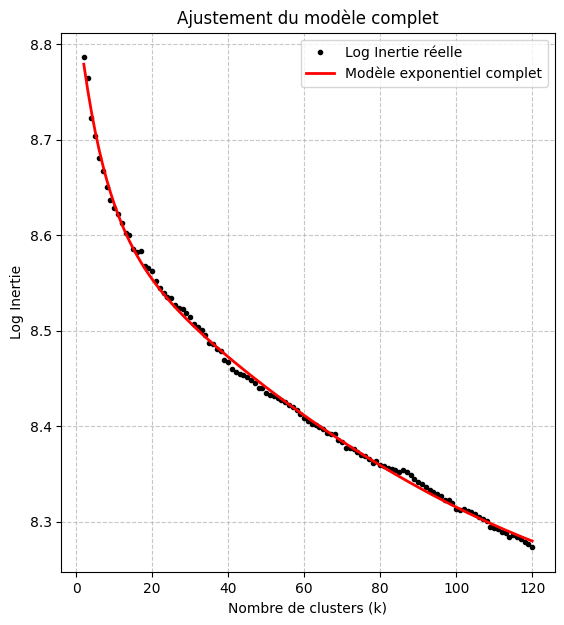

In [21]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

max_k = 120
xdata = np.array(range(2, max_k + 1))
ydata = log_inertias  # On travaille directement avec log_inertias

# Définition du modèle exponentiel décroissant avec termes linéaire et quadratique
def exp_decreasing(x, a, b, c, d, e):
    return a * np.exp(-b * x) + c + d*x + e*x*x

p0 = [0.5, 0.1, 13.0, -0.001, 0.00001]  # Valeurs initiales pour (a, b, c, d, e)
params, covariance = curve_fit(exp_decreasing, xdata, ydata, p0=p0, maxfev=10000)

# Extraction des paramètres
a, b, c, d, e = params
print(f"Paramètres : a = {a:.6f}, b = {b:.6f}, c = {c:.6f}, d = {d:.6f}, e = {e:.8f}")

# Prédiction avec le modèle ajusté
y_pred = exp_decreasing(xdata, *params)

# Calcul de l'erreur quadratique moyenne
rmse = np.sqrt(np.mean((ydata - y_pred)**2))
print(f"RMSE : {rmse:.6f}")

# Visualisation
plt.figure(figsize=(14, 7))

# Graphique principal
plt.subplot(1, 2, 1)
plt.plot(xdata, ydata, 'ko', markersize=3, label='Log Inertie réelle')
plt.plot(xdata, y_pred, 'r-', linewidth=2, label='Modèle exponentiel complet')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Log Inertie')
plt.title('Ajustement du modèle complet')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)



# Analyse pour déterminer le k optimal
# Calcul des dérivées du modèle
def exp_decreasing_derivative(x, a, b, c, d, e):
    return -a * b * np.exp(-b * x) + d + 2*e*x

# Calculer la dérivée pour identifier le coude
x_fine = np.linspace(2, max_k, 1000)
y_fine = exp_decreasing(x_fine, *params)
derivative = exp_decreasing_derivative(x_fine, *params)

# Calcul de la dérivée seconde pour identifier le coude
def exp_decreasing_second_derivative(x, a, b, c, d, e):
    return a * b * b * np.exp(-b * x) + 2*e

second_derivative = exp_decreasing_second_derivative(x_fine, *params)

def exp_decreasing_third_derivative(x, a, b, c, d, e):
    return -a * b * b * b * np.exp(-b * x)

third_derivative = exp_decreasing_third_derivative(x_fine, *params)

max_third_deriv_idx = np.argmax(np.abs(third_derivative))
k_optimal = x_fine[max_third_deriv_idx]

def normalized_curvature(x, a, b, c, d, e):
    first_deriv = -a * b * np.exp(-b * x) + d + 2*e*x
    second_deriv = a * b * b * np.exp(-b * x) + 2*e
    return np.abs(second_deriv) / (1 + first_deriv**2)**1.5

curvature = normalized_curvature(x_fine, *params)

max_curvature_idx = np.argmax(curvature)
k_optimal_curvature = x_fine[max_curvature_idx]



print(f"Le k optimal estimé par la dérivée troisième est : {k_optimal:.2f}")
print(f"Le k optimal estimé par la courbure normalisée est : {k_optimal_curvature:.2f}")
print(f"Paramètres du modèle :")
print(f"a = {a:.6f} (amplitude exponentielle)")
print(f"b = {b:.6f} (taux de décroissance)")
print(f"c = {c:.6f} (offset)")
print(f"d = {d:.6f} (terme linéaire)")
print(f"e = {e:.8f} (terme quadratique)")

k_values = np.linspace(2, max_k, 1000)
exp_component = a * np.exp(-b * k_values)
linear_component = d * k_values
quadratic_component = e * k_values * k_values
constant_component = c

error = ydata - y_pred
rmse_by_point = np.sqrt(error**2)


print(f"RMSE global : {rmse:.6f}")
print(f"Erreur maximale : {np.max(rmse_by_point):.6f}")
print(f"Erreur minimale : {np.min(rmse_by_point):.6f}")
print(f"Erreur moyenne : {np.mean(rmse_by_point):.6f}")

OK, cela nous convient ! On prend donc le paramètre b qui est de 0.095413

$$f(t) = a e^{-b x } + c + d x + e x²$$
$$n_{cluster} = \dfrac{5}{b}$$

In [22]:
nb_clusters=5/b
print(nb_clusters)

35.336241703652576


In [23]:
from sklearn.cluster import KMeans

n_clusters = 35
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings)

In [24]:
df.head(15)

,_id,titre,titre_sujet,Nom_du_cours,contenu_message,username,votes,comments_count,created_at,cluster
0,56fce2f6bf989a69b0000043,Présentation,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,Bonjour à tous\nJe m'appelle Jean-Louis\n,Djuz87,0,0,2016-03-31T08:42:30Z,23
1,56fce48360d73bd31400003c,Fablab ?,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour,\nje m'appelle Thomas, j'habite Mens (...",Togo,0,3,2016-03-31T08:49:07Z,26
2,56fce4f06b03283c5c00002f,Présentation,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour à tous, je m'appelle Carola. J'ai déjà...",Carola,0,2,2016-03-31T08:50:56Z,33
3,56fce6009b101d3794000044,Présentation,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour,\nje m'appelle Nicolas,\nje fais de l'...",nicopupu,0,0,2016-03-31T08:55:28Z,6
4,56fce65260d73b496f000034,PRSENTATION,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour,\nJe suis Wassim IBRAHIM étudiant en 2...",wassim_ibrahim,0,0,2016-03-31T08:56:50Z,25
5,56fce6a254ecc0e95c000043,Présentation nouveau membre Lyon 69004,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour à tous,\nje commence le Mooc sur Ardui...",Bouradou,0,1,2016-03-31T08:58:10Z,33
6,56fce7445f04eab54b00004e,Présentation,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour, je suis Karine Lambin, enseignante en...",klambin,0,0,2016-03-31T09:00:52Z,13
7,56fce8516b03283c7400002a,Présentation,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour Damien de côte d'or 35ans, \nPas de co...",doe1980,0,0,2016-03-31T09:05:21Z,26
8,56fce8645f04ea2a4b000052,Bonjour,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour, \nJe m'appelle lélio, ingénieur en in...",lelio,0,0,2016-03-31T09:05:40Z,13
9,56fce909a0a686d60200004f,Presentation/Mot de passe,Bienvenue / Présentez-vous,MinesTelecom/04017/session01,"Bonjour, \n\nJe m'appelle Théo, enseignant de ...",Tchae,0,6,2016-03-31T09:08:25Z,17
